## Dataset Details
 
#### I choose to analysis “No-show appointments” dataset from https://www.kaggle.com/joniarroba/noshowappointments.

### Context details and intention
#### A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?  From the given dataset, I intend to predict which feature(s) helps patient in keeping the doctor appointment.  

 
### Data Dictionary  

- PatientId - Identification of a patient
- AppointmentID - Identification of each appointment
- Gender = Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
- DataMarcacaoConsulta = The day of the actuall appointment, when they have to visit the doctor. - - - DataAgendamento = The day someone called or registered the appointment, this is before appointment of course.
- Age = How old is the patient.
- Neighbourhood = Where the appointment takes place.
- Scholarship = Ture of False . Details are are at https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia 
- Hipertension = True or False
- Diabetes = True or False 
- Alcoholism = True or False 
- Handcap = True or False 
- SMS_received = 1 or more messages sent to the patient.
- No-show = True or False.



## Question Posed

#### Q1 : Is nature of ailment is responsible for the patient to "Show-up" or "Not Show-up" for their scheduled appointment? So I tried to predict by finding probability  if 
- "hypertension"  is responsible for "No-Show."
- "diabetes"  is responsible for "No-Show."
- "alcoholism"  is responsible for "No-Show."
- "handicap"  is responsible for "No-Show."
- "sms_received"  is responsible for "No-Show."

#### Q2 : Is “gender” has to do with patient show up for their scheduled appointment? So, I try to predict if gender  “Female” is more caring/responsible than  gender  “Male.”


#### Q3 : Is particular month(s) or day of the week when patient miss appointment. This "No-Show" may be due to a cultural or religious event.  Brazil has a fun loving culture (ref:https://www.timeanddate.com/holidays/brazil/) therefore months "May" and April may have more "No-Show" in comparison to other months. These "No-Show" may be because Brazil has days long fun-loving community celebration (ref:https://www.timeanddate.com/holidays/brazil/) therefore months "May," and April may have more "No-Show" in comparison to other months.


## Data Wrangling


### Import modules

In [1]:
import pandas as pd
import numpy as np
import calendar

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

%matplotlib inline


### Data Wrangling:Import Dataset CSV file for "No Show Apppointments"

In [2]:
df_noshow = pd.read_csv('noshowappointment.csv')

In [3]:
df_noshow.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


#### Data Wrangling:fixing column names

In [4]:
list_df_noshow_col = df_noshow.columns


list_df_noshow_new_col = []
for e in list_df_noshow_col:
    e = e.lower()
    if 'id' in e:
        e = e[:-2] + "_id"
        list_df_noshow_new_col.append(e)
        
    elif 'day' in e:
        e = e[:-3] + "_day"
        list_df_noshow_new_col.append(e)
        
    elif 'hipertension' in e:
        e = 'hypertension'
        list_df_noshow_new_col.append(e)
        
    elif 'handcap' in e:
        e = 'handicap'
        list_df_noshow_new_col.append(e)
        
    elif '_' or '-' in e:
        e = e.replace('-','_')
        list_df_noshow_new_col.append(e)

print(list_df_noshow_new_col)
        
        

['patient_id', 'appointment_id', 'gender', 'scheduled_day', 'appointment_day', 'age', 'neighbourhood', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show']


In [5]:
# rename column
df_noshow.columns = ['patient_id', 'appointment_id', 'gender', 'scheduled_day', 'appointment_day', 'age', 'neighbourhood', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show']

In [6]:
df_noshow.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Choosing rows in column 'age' between 0 and 101. Discarding rows where 'age' values are negative or more than 100.

In [7]:
df_no_show = df_noshow.query(' age  > 0 and age < 101 ')
df_no_show.tail()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


#### Data Wrangling:checking for null entry

In [8]:
df_noshow.isnull().sum()

patient_id         0
appointment_id     0
gender             0
scheduled_day      0
appointment_day    0
age                0
neighbourhood      0
scholarship        0
hypertension       0
diabetes           0
alcoholism         0
handicap           0
sms_received       0
no_show            0
dtype: int64

#### Data Wrangling:checking for duplicate entries

In [9]:
df_noshow.duplicated().sum()

0

In [10]:
df_noshow.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'no_show'],
      dtype='object')

In [11]:
df_noshow['patient_id'].duplicated().sum()

48228

In [12]:
df_noshow['appointment_id'].duplicated().sum()

0

##### Deleting  column  'appointment_id' as it does not seems to give any indication of patient No-Show for an appointment.


In [13]:
df_noshow.drop(['appointment_id'], axis=1, inplace=True)

##### Converting column 'scheduled_day'  and 'appointment_day' into datatime format.

In [14]:
df_noshow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
patient_id         110527 non-null float64
gender             110527 non-null object
scheduled_day      110527 non-null object
appointment_day    110527 non-null object
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null object
dtypes: float64(1), int64(7), object(5)
memory usage: 11.0+ MB


In [15]:
df_noshow['scheduled_day'] = pd.to_datetime(df_noshow['scheduled_day'])
df_noshow['appointment_day'] = pd.to_datetime(df_noshow['appointment_day'])

In [16]:
df_noshow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
patient_id         110527 non-null float64
gender             110527 non-null object
scheduled_day      110527 non-null datetime64[ns]
appointment_day    110527 non-null datetime64[ns]
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(7), object(3)
memory usage: 11.0+ MB


In [17]:
# adding year, month, weekday, and hour column
df_noshow['scheduled_day_year'] = df_noshow['scheduled_day'].dt.year

# Extracting month number and creating new column 'scheduled_day_month'
df_noshow['scheduled_day_month'] = df_noshow['scheduled_day'].dt.month
# Extracting month name and creating new column 'Start_Time_month_name'
df_noshow['scheduled_day_month_name'] = df_noshow['scheduled_day'].dt.month.apply(lambda x: calendar.month_name[x])

# Extracting weekday name and creating new column 'Start_Time_day_of_week'
df_noshow['scheduled_day_week_name'] = df_noshow['scheduled_day'].dt.weekday_name

# Extracting hour and creating new column 'Start_Time_hour'
df_noshow['scheduled_day_hour'] = df_noshow['scheduled_day'].dt.hour

In [18]:
df_noshow.head(3)

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,scheduled_day_year,scheduled_day_month,scheduled_day_month_name,scheduled_day_week_name,scheduled_day_hour
0,2.987250e+13,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016,4,April,Friday,18
1,5.589978e+14,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016,4,April,Friday,16
2,4.262962e+12,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016,4,April,Friday,16


#### Discarding same day appointments

In [19]:
df_noshow['days_to_appointment'] = df_noshow['appointment_day'].dt.day - df_noshow['scheduled_day'].dt.day
df_noshow = df_noshow.query(' days_to_appointment  > 0 ')
df_noshow.head()

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,scheduled_day_year,scheduled_day_month,scheduled_day_month_name,scheduled_day_week_name,scheduled_day_hour,days_to_appointment
5,9.598513e+13,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,2016,4,April,Wednesday,8,2
6,7.336882e+14,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2016,4,April,Wednesday,15,2
7,3.449833e+12,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2016,4,April,Wednesday,15,2
9,7.812456e+13,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,2016,4,April,Wednesday,12,2
10,7.345362e+14,F,2016-04-27 14:58:11,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,No,2016,4,April,Wednesday,14,2


In [20]:
df_noshow.shape

(41027, 19)

In [21]:
df_noshow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41027 entries, 5 to 110523
Data columns (total 19 columns):
patient_id                  41027 non-null float64
gender                      41027 non-null object
scheduled_day               41027 non-null datetime64[ns]
appointment_day             41027 non-null datetime64[ns]
age                         41027 non-null int64
neighbourhood               41027 non-null object
scholarship                 41027 non-null int64
hypertension                41027 non-null int64
diabetes                    41027 non-null int64
alcoholism                  41027 non-null int64
handicap                    41027 non-null int64
sms_received                41027 non-null int64
no_show                     41027 non-null object
scheduled_day_year          41027 non-null int64
scheduled_day_month         41027 non-null int64
scheduled_day_month_name    41027 non-null object
scheduled_day_week_name     41027 non-null object
scheduled_day_hour          4102

##  Creating various Dataframe based on criteria for further analysis

In [22]:
df_noshow.head()

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,scheduled_day_year,scheduled_day_month,scheduled_day_month_name,scheduled_day_week_name,scheduled_day_hour,days_to_appointment
5,9.598513e+13,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,2016,4,April,Wednesday,8,2
6,7.336882e+14,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2016,4,April,Wednesday,15,2
7,3.449833e+12,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2016,4,April,Wednesday,15,2
9,7.812456e+13,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,2016,4,April,Wednesday,12,2
10,7.345362e+14,F,2016-04-27 14:58:11,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,No,2016,4,April,Wednesday,14,2


#### Dataframe where the patient did NOT show up for appointment

In [23]:
df_noshow_yes = df_noshow[df_noshow['no_show'] == 'Yes']

In [24]:
df_noshow_yes.head(3)

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,scheduled_day_year,scheduled_day_month,scheduled_day_month_name,scheduled_day_week_name,scheduled_day_hour,days_to_appointment
6,7.336882e+14,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2016,4,April,Wednesday,15,2
7,3.449833e+12,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2016,4,April,Wednesday,15,2
11,7.542951e+12,M,2016-04-26 08:44:12,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,2016,4,April,Tuesday,8,3


#### Dataframe where the patient did show up for appointment	

In [25]:
df_noshow_no = df_noshow[df_noshow['no_show'] == 'No']

In [26]:
df_noshow_no.head(3)

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,scheduled_day_year,scheduled_day_month,scheduled_day_month_name,scheduled_day_week_name,scheduled_day_hour,days_to_appointment
5,9.598513e+13,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,2016,4,April,Wednesday,8,2
9,7.812456e+13,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,2016,4,April,Wednesday,12,2
10,7.345362e+14,F,2016-04-27 14:58:11,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,No,2016,4,April,Wednesday,14,2


## Exploratory Data Analysis(EDA)

In [27]:
df_noshow.shape

(41027, 19)

In [28]:
df_noshow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41027 entries, 5 to 110523
Data columns (total 19 columns):
patient_id                  41027 non-null float64
gender                      41027 non-null object
scheduled_day               41027 non-null datetime64[ns]
appointment_day             41027 non-null datetime64[ns]
age                         41027 non-null int64
neighbourhood               41027 non-null object
scholarship                 41027 non-null int64
hypertension                41027 non-null int64
diabetes                    41027 non-null int64
alcoholism                  41027 non-null int64
handicap                    41027 non-null int64
sms_received                41027 non-null int64
no_show                     41027 non-null object
scheduled_day_year          41027 non-null int64
scheduled_day_month         41027 non-null int64
scheduled_day_month_name    41027 non-null object
scheduled_day_week_name     41027 non-null object
scheduled_day_hour          4102

### Summary Statistics

In [29]:
df_noshow.describe()

,patient_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,scheduled_day_year,scheduled_day_month,scheduled_day_hour,days_to_appointment
count,4.102700e+04,41027.000000,41027.000000,41027.000000,41027.000000,41027.000000,41027.000000,41027.000000,41027.000000,41027.000000,41027.000000,41027.000000
mean,1.437867e+14,39.667755,0.088746,0.220099,0.082434,0.026154,0.020791,0.377264,2015.999293,4.890243,11.133936,6.438857
std,2.520483e+14,22.900547,0.284381,0.414318,0.275027,0.159594,0.156223,0.484708,0.026578,0.676376,3.332926,5.739841
min,5.628261e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,1.000000,6.000000,1.000000
25%,3.951689e+12,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,5.000000,8.000000,2.000000
50%,2.927465e+13,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,5.000000,11.000000,5.000000
75%,9.305409e+13,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2016.000000,5.000000,14.000000,8.000000
max,9.999320e+14,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,2016.000000,12.000000,20.000000,30.000000


### Predicting "No Show Appointment" based on feature "scholarship" and "no_show."

In [30]:
def probability_scholarship(df):
    """This function returns the probability of patient  Keeping and Not-Keeping the doctor's appointment based on
         whether he/she received the scholarship or did not receive scholarship.
    Args:
        df: Dataset's Panda Dataframe
    Returns:
        rtype:(float, float, float, float)
    """
    
    df_scholarship_no_show_yes = df_noshow.query('scholarship == 1 and no_show == "Yes"').reset_index(drop=True)
    df_scholarship_no_show_no =  df_noshow.query(' scholarship == 1 and no_show == "No" ').reset_index(drop=True)
    
    df_no_scholarship_no_show_yes = df_noshow.query('scholarship == 0 and no_show == "Yes"').reset_index(drop=True)
    df_no_scholarship_no_show_no =  df_noshow.query(' scholarship == 0 and no_show == "No" ').reset_index(drop=True)
    
    total_scholarship = len(df_scholarship_no_show_yes['no_show']) + len(df_scholarship_no_show_no['no_show'])
    total_no_scholarship = len(df_no_scholarship_no_show_yes['no_show']) + len(df_no_scholarship_no_show_no['no_show'])
    
    probability_scholarship_no_show_yes  = len(df_scholarship_no_show_yes['no_show']) / total_scholarship
    probability_scholarship_no_show_no = len(df_scholarship_no_show_no['no_show']) / total_scholarship
    
    probability_no_scholarship_no_show_yes  = len(df_scholarship_no_show_yes['no_show']) / total_no_scholarship
    probability_no_scholarship_no_show_no = len(df_scholarship_no_show_no['no_show']) / total_no_scholarship
    
    return ( probability_scholarship_no_show_yes, probability_scholarship_no_show_no, probability_no_scholarship_no_show_yes, probability_no_scholarship_no_show_no )



p_scholarship = probability_scholarship(df_noshow)
p_scholarship_no_show_yes, p_scholarship_no_show_no, p_no_scholarship_no_show_yes, p_no_scholarship_no_show_no  = p_scholarship


print("Probability of patient having scholarship Not keeping appointment     | {:^.4f}.".format(p_scholarship_no_show_yes))
print("Probability of patient having scholarship keeping appointment         | {:^.4f}.".format(p_scholarship_no_show_no))

print("Probability of patient NOT having scholarship Not keeping appointment | {:^.4f}.".format(p_no_scholarship_no_show_yes))
print("Probability of patient NOT having scholarship keeping appointment     | {:^.4f}.".format(p_no_scholarship_no_show_no))
 


Probability of patient having scholarship Not keeping appointment     | 0.3299.
Probability of patient having scholarship keeping appointment         | 0.6701.
Probability of patient NOT having scholarship Not keeping appointment | 0.0321.
Probability of patient NOT having scholarship keeping appointment     | 0.0653.


#### Conclusion:Thus Patients enrolled in government scholarship have the high probability(0.7626) of keeping Appointment in comparison to the prababilty of Patients NOT enrolled in government scholarship program(0.0831). Therefore, financial incentive or "scholarship" support by the government is may be factor for Patient for showing up for medical appointments.


### Predicting "No Show Appointment" based on feature "hypertension" and "no_show."

In [31]:
def probability_hypertension(df):
    """This function returns the probability of hypertension patient Keeping or Not-Keeping the doctor's appointment and
        the probability of non-hypertension patient Keeping or Not-Keeping the doctor's appointment.  
    Args:
        df: Dataset's Panda Dataframe
    Returns:
        rtype:(float, float, float, float)
    """
    df_hypertension_no_show_yes = df_noshow.query('hypertension == 1 and no_show == "Yes"').reset_index(drop=True)
    df_hypertension_no_show_no =  df_noshow.query(' hypertension == 1 and no_show == "No" ').reset_index(drop=True)
    
    df_no_hypertension_no_show_yes = df_noshow.query('hypertension == 0 and no_show == "Yes"').reset_index(drop=True)
    df_no_hypertension_no_show_no =  df_noshow.query(' hypertension == 0 and no_show == "No" ').reset_index(drop=True)
    
    total_hypertension = len(df_hypertension_no_show_yes['no_show']) + len(df_hypertension_no_show_no['no_show'])
    total_no_hypertension = len(df_no_hypertension_no_show_yes['no_show']) + len(df_no_hypertension_no_show_no['no_show'])
    
    probability_hypertension_no_show_yes  = len(df_hypertension_no_show_yes['no_show']) / total_hypertension
    probability_hypertension_no_show_no = len(df_hypertension_no_show_no['no_show']) / total_hypertension
    
    probability_no_hypertension_no_show_yes  = len(df_hypertension_no_show_yes['no_show']) / total_no_hypertension
    probability_no_hypertension_no_show_no = len(df_hypertension_no_show_no['no_show']) / total_no_hypertension
    
    return ( probability_hypertension_no_show_yes, probability_hypertension_no_show_no, probability_no_hypertension_no_show_yes, probability_no_hypertension_no_show_no )



In [32]:
p_hypertension = probability_hypertension(df_noshow)
p_hypertension_no_show_yes, p_hypertension_no_show_no, p_no_hypertension_no_show_yes, p_no_hypertension_no_show_no  = p_hypertension


print("Probability of hypertension Not keeping appointment     | {:^.4f}.".format(p_hypertension_no_show_yes))
print("Probability of hypertension keeping appointment         | {:^.4f}.".format(p_hypertension_no_show_no))

print("Probability of NOT hypertension Not keeping appointment | {:^.4f}.".format(p_no_hypertension_no_show_yes))
print("Probability of NOT hypertension keeping appointment     | {:^.4f}.".format(p_no_hypertension_no_show_no))


Probability of hypertension Not keeping appointment     | 0.2237.
Probability of hypertension keeping appointment         | 0.7763.
Probability of NOT hypertension Not keeping appointment | 0.0631.
Probability of NOT hypertension keeping appointment     | 0.2191.


#### Because the probability of the patient in hypertension condition and keeping an appointment is more(0.8270) than the patient NOT in hypertension condition and keeping an appointment(0.2032), thus feature "hypertension" does not help in predicting whether the patient will keep the appointment or not.



### Predicting "No Show Appointment" based on feature "diabetes" and "no_show."

In [33]:

def probability_diabetes(df):
    """This function returns the probability of diabetes patient Keeping or Not-Keeping the doctor's
   appointment and the probability of non-diabetic patient Keeping or Not-Keeping the doctor's appointment.  
    Args:
        df: Dataset's Panda Dataframe
    Returns:
        rtype:(float, float, float, float)
    """
    df_diabetes_no_show_yes = df_noshow.query('diabetes == 1 and no_show == "Yes"').reset_index(drop=True)
    df_diabetes_no_show_no =  df_noshow.query(' diabetes == 1 and no_show == "No" ').reset_index(drop=True)
    
    df_no_diabetes_no_show_yes = df_noshow.query('diabetes == 0 and no_show == "Yes"').reset_index(drop=True)
    df_no_diabetes_no_show_no =  df_noshow.query(' diabetes == 0 and no_show == "No" ').reset_index(drop=True)
    
    total_diabetes = len(df_diabetes_no_show_yes['no_show']) + len(df_diabetes_no_show_no['no_show'])
    total_no_diabetes = len(df_no_diabetes_no_show_yes['no_show']) + len(df_no_diabetes_no_show_no['no_show'])
    
    probability_diabetes_no_show_yes  = len(df_diabetes_no_show_yes['no_show']) / total_diabetes
    probability_diabetes_no_show_no = len(df_diabetes_no_show_no['no_show']) / total_diabetes
    
    probability_no_diabetes_no_show_yes  = len(df_diabetes_no_show_yes['no_show']) / total_no_diabetes
    probability_no_diabetes_no_show_no = len(df_diabetes_no_show_no['no_show']) / total_no_diabetes
    
    return ( probability_diabetes_no_show_yes, probability_diabetes_no_show_no, probability_no_diabetes_no_show_yes, probability_no_diabetes_no_show_no )


In [34]:
p_diabetes = probability_diabetes(df_noshow)
p_diabetes_no_show_yes, p_diabetes_no_show_no, p_no_diabetes_no_show_yes, p_no_diabetes_no_show_no  = p_diabetes


print("Probability of diabetes Not keeping appointment     | {:^.4f}.".format(p_diabetes_no_show_yes))
print("Probability of diabetes keeping appointment         | {:^.4f}.".format(p_diabetes_no_show_no))

print("Probability of NOT diabetes Not keeping appointment | {:^.4f}.".format(p_no_diabetes_no_show_yes))
print("Probability of NOT diabetes keeping appointment     | {:^.4f}.".format(p_no_diabetes_no_show_no))


Probability of diabetes Not keeping appointment     | 0.2401.
Probability of diabetes keeping appointment         | 0.7599.
Probability of NOT diabetes Not keeping appointment | 0.0216.
Probability of NOT diabetes keeping appointment     | 0.0683.


#### Because the probability of the patient in diabetes condition and keeping an appointment is more(0.8200) than the patient NOT in diabetes condition and keeping an appointment(0.0635), thus feature "diabetes" does not help in predicting whether the patient will keep the appointment or not.

### Predicting "No Show Appointment" based on feature "alcoholism" and "no_show."

In [35]:
def probability_alcoholism(df):
    """This function returns the probability of alcoholic patient Keeping or Not-Keeping the doctor's appointment
   and the probability of non-alcoholic patient Keeping and Not-Keeping the doctor's appointment.  
    Args:
        df: Dataset's Panda Dataframe
    Returns:
        rtype:(float, float, float, float)
    """
    df_alcoholism_no_show_yes = df_noshow.query('alcoholism == 1 and no_show == "Yes"').reset_index(drop=True)
    df_alcoholism_no_show_no =  df_noshow.query(' alcoholism == 1 and no_show == "No" ').reset_index(drop=True)
    
    df_no_alcoholism_no_show_yes = df_noshow.query('alcoholism == 0 and no_show == "Yes"').reset_index(drop=True)
    df_no_alcoholism_no_show_no =  df_noshow.query(' alcoholism == 0 and no_show == "No" ').reset_index(drop=True)
    
    total_alcoholism = len(df_alcoholism_no_show_yes['no_show']) + len(df_alcoholism_no_show_no['no_show'])
    total_no_alcoholism = len(df_no_alcoholism_no_show_yes['no_show']) + len(df_no_alcoholism_no_show_no['no_show'])
    
    probability_alcoholism_no_show_yes  = len(df_alcoholism_no_show_yes['no_show']) / total_alcoholism
    probability_alcoholism_no_show_no = len(df_alcoholism_no_show_no['no_show']) / total_alcoholism
    
    probability_no_alcoholism_no_show_yes  = len(df_alcoholism_no_show_yes['no_show']) / total_no_alcoholism
    probability_no_alcoholism_no_show_no = len(df_alcoholism_no_show_no['no_show']) / total_no_alcoholism
    
    return ( probability_alcoholism_no_show_yes, probability_alcoholism_no_show_no, probability_no_alcoholism_no_show_yes, probability_no_alcoholism_no_show_no )

In [36]:
p_alcoholism = probability_alcoholism(df_noshow)
p_alcoholism_no_show_yes, p_alcoholism_no_show_no, p_no_alcoholism_no_show_yes, p_no_alcoholism_no_show_no  = p_alcoholism


print("Probability of alcoholism Not keeping appointment     | {:^.4f}.".format(p_alcoholism_no_show_yes))
print("Probability of alcoholism keeping appointment         | {:^.4f}.".format(p_alcoholism_no_show_no))

print("Probability of NOT alcoholism Not keeping appointment | {:^.4f}.".format(p_no_alcoholism_no_show_yes))
print("Probability of NOT alcoholism keeping appointment     | {:^.4f}.".format(p_no_alcoholism_no_show_no))



Probability of alcoholism Not keeping appointment     | 0.3234.
Probability of alcoholism keeping appointment         | 0.6766.
Probability of NOT alcoholism Not keeping appointment | 0.0087.
Probability of NOT alcoholism keeping appointment     | 0.0182.


#### Because the probability of the patient in alcoholism condition and keeping an appointment is more(0.79) than the patient NOT in alcoholism condition and keeping an appointment(0.0250), thus feature "handicap" does not help in predicting whether the patient will keep the appointment or not.

 ### Predicting "No Show Appointment" based on feature "handicap" and "no_show."

In [37]:
def probability_handicap(df):
    """This function returns the probability of handicap patient Keeping or Not-Keeping the doctor's
    appointment and the probability of non-handicap patient Keeping and Not-Keeping the doctor's appointment.  
    Args:
        df: Dataset's Panda Dataframe
    Returns:
        rtype:(float, float, float, float)
    """
    df_handicap_no_show_yes = df_noshow.query('handicap == 1 and no_show == "Yes"').reset_index(drop=True)
    df_handicap_no_show_no =  df_noshow.query(' handicap == 1 and no_show == "No" ').reset_index(drop=True)
    
    df_no_handicap_no_show_yes = df_noshow.query('handicap == 0 and no_show == "Yes"').reset_index(drop=True)
    df_no_handicap_no_show_no =  df_noshow.query(' handicap == 0 and no_show == "No" ').reset_index(drop=True)
    
    total_handicap = len(df_handicap_no_show_yes['no_show']) + len(df_handicap_no_show_no['no_show'])
    total_no_handicap = len(df_no_handicap_no_show_yes['no_show']) + len(df_no_handicap_no_show_no['no_show'])
    
    probability_handicap_no_show_yes  = len(df_handicap_no_show_yes['no_show']) / total_handicap
    probability_handicap_no_show_no = len(df_handicap_no_show_no['no_show']) / total_handicap
    
    probability_no_handicap_no_show_yes  = len(df_handicap_no_show_yes['no_show']) / total_no_handicap
    probability_no_handicap_no_show_no = len(df_handicap_no_show_no['no_show']) / total_no_handicap
    
    return ( probability_handicap_no_show_yes, probability_handicap_no_show_no, probability_no_handicap_no_show_yes, probability_no_handicap_no_show_no )


In [38]:
p_handicap = probability_handicap(df_noshow)
p_handicap_no_show_yes, p_handicap_no_show_no, p_no_handicap_no_show_yes, p_no_handicap_no_show_no  = p_handicap


print("Probability of Handicap Not keeping appointment     | {:^.4f}.".format(p_handicap_no_show_yes))
print("Probability of Handicap keeping appointment         | {:^.4f}.".format(p_handicap_no_show_no))

print("Probability of NOT Handicap Not keeping appointment | {:^.4f}.".format(p_no_handicap_no_show_yes))
print("Probability of NOT Handicap keeping appointment     | {:^.4f}.".format(p_no_handicap_no_show_no))
print(type(p_handicap_no_show_yes))

Probability of Handicap Not keeping appointment     | 0.2358.
Probability of Handicap keeping appointment         | 0.7642.
Probability of NOT Handicap Not keeping appointment | 0.0041.
Probability of NOT Handicap keeping appointment     | 0.0134.
<class 'float'>


#### Because the probability of people in handicap condition and keeping an appointment is more(0.7642) than people NOT in handicap condition and keeping an appointment(0.0134), thus feature "handicap" does not help in predicting whether the patient will keep the appointment or not.

### Predicting "No Show Appointment" based on feature "sms_received" and "no_show."

In [39]:
def probability_sms_received(df):
    """This function returns the probability of patient Keeping or Not-Keeping the doctor's appointment
    based on whether he received SMS-Message or did not received SMS-Message.
    Args:
        df: Dataset's Panda Dataframe
    Returns:
        rtype:(float, float, float, float)

    """
    df_sms_no_show_yes = df_noshow.query('sms_received == 1 and no_show == "Yes"').reset_index(drop=True)
    df_sms_no_show_no =  df_noshow.query(' sms_received == 1 and no_show == "No" ').reset_index(drop=True)
    
    df_no_sms_no_show_yes = df_noshow.query('sms_received == 0 and no_show == "Yes"').reset_index(drop=True)
    df_no_sms_no_show_no =  df_noshow.query(' sms_received == 0 and no_show == "No" ').reset_index(drop=True)
    
    total_sms = len(df_sms_no_show_yes['no_show']) + len(df_sms_no_show_no['no_show'])
    total_no_sms = len(df_no_sms_no_show_yes['no_show']) + len(df_no_sms_no_show_no['no_show'])
    
    probability_sms_no_show_yes  = len(df_sms_no_show_yes['no_show']) / total_sms
    probability_sms_no_show_no = len(df_sms_no_show_no['no_show']) / total_sms
    
    probability_no_sms_no_show_yes  = len(df_sms_no_show_yes['no_show']) / total_no_sms
    probability_no_sms_no_show_no = len(df_sms_no_show_no['no_show']) / total_no_sms
    
    return ( probability_sms_no_show_yes, probability_sms_no_show_no, probability_no_sms_no_show_yes, probability_no_sms_no_show_no )
    

In [40]:
p_sms = probability_sms_received(df_noshow)
p_sms_no_show_yes, p_sms_no_show_no, p_no_sms_no_show_yes, p_no_sms_no_show_no  = p_sms


print("Probability of SMS received & Not keeping appointment     | {:^.4f}.".format(p_sms_no_show_yes))
print("Probability of SMS received & keeping appointment         | {:^.4f}.".format(p_sms_no_show_no))

print("Probability of SMS NOT received & Not keeping appointment | {:^.4f}.".format(p_no_sms_no_show_yes))
print("Probability of SMS NOT received & keeping appointment     | {:^.4f}.".format(p_no_sms_no_show_no))


Probability of SMS received & Not keeping appointment     | 0.2608.
Probability of SMS received & keeping appointment         | 0.7392.
Probability of SMS NOT received & Not keeping appointment | 0.1580.
Probability of SMS NOT received & keeping appointment     | 0.4478.


#### Because the probability of people receiving SMS text and keeping an appointment(0.7392) is more than people NOT receiving SMS and keeping an appointment(0.4478), thus SMS text does help the patient in keeping the appointment. Thus SMS text service should stay put.

### Predicting "No Show Appointment" based on feature "gender" and "no_show."

In [41]:
def probability_gender_male(df):
    """This function returns the probability of the patient having Gender: Male,
        Keeping or Not-Keeping the doctor's appointment. 
    Args:
        df: Dataset's Panda Dataframe
    Returns:
        rtype:(float, float, float, float)
    """
    df_gender_no_show_yes = df.query(' gender == "M" and no_show == "Yes" ').reset_index(drop=True)
    df_gender_no_show_no = df.query(' gender == "M" and no_show == "No" ').reset_index(drop=True)
    
    total = len(df_gender_no_show_yes['no_show']) + len(df_gender_no_show_no['no_show'])
    
    probability_no_show_no  = len(df_gender_no_show_no['no_show']) / total
    probability_no_show_yes = len(df_gender_no_show_yes['no_show']) / total
    
    return (probability_no_show_no, probability_no_show_yes)
    

    
def probability_gender_female(df):
    """This function returns the probability of the patient having Gender: Female,
       Keeping or Not-Keeping the doctor's appointment. 
    Args:
        df: Dataset's Panda Dataframe
    Returns:
        rtype:(float, float, float, float)
    """
    df_gender_no_show_yes = df.query(' gender == "F" and no_show == "Yes" ').reset_index(drop=True)
    df_gender_no_show_no = df.query(' gender == "F" and no_show == "No" ').reset_index(drop=True)

    total = len(df_gender_no_show_yes['no_show']) + len(df_gender_no_show_no['no_show'])
  
    probability_no_show_no  = len(df_gender_no_show_no['no_show']) / total
    probability_no_show_yes = len(df_gender_no_show_yes['no_show']) / total

    return (probability_no_show_no, probability_no_show_yes)

In [42]:
p_m = probability_gender_male(df_noshow)
p_m_no_show_no, p_m_no_show_yes = p_m

print("Probability of Gender Male keeping appointment      | {:^.4f}.".format(p_m_no_show_no))
print("Probability of Gender Male Not keeping appointment  | {:^.4f}.".format(p_m_no_show_yes))

Probability of Gender Male keeping appointment      | 0.7290.
Probability of Gender Male Not keeping appointment  | 0.2710.


In [43]:
p_f = probability_gender_female(df_noshow)
p_f_no_show_no, p_f_no_show_yes = p_f

print("Probability of Gender Female keeping appointment      | {:^.4f}.".format(p_f_no_show_no))
print("Probability of Gender Female Not keeping appointment  | {:^.4f}.".format(p_f_no_show_yes))

Probability of Gender Female keeping appointment      | 0.7318.
Probability of Gender Female Not keeping appointment  | 0.2682.


#### Probability of keeping the doctor appointment by gender Female(0.7318) is slightly more than Male(0.7290) thus not a good predictor of keeping the appointment by gender.


## Plotting Trend

#### Plot 1:Finding if there is a trend between Age and keeping the appointment or not.

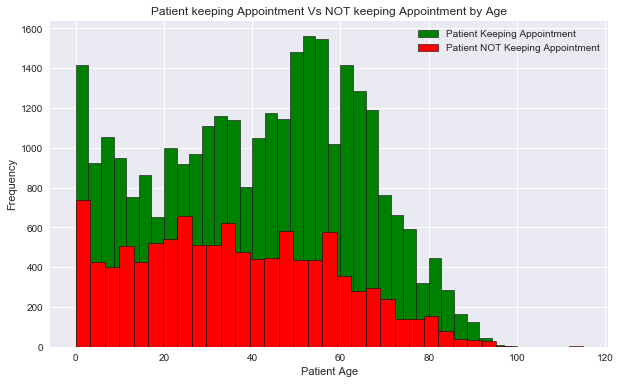

In [44]:
# Applying filter on Dataframe for column 'no_show' for 'No' and 'Yes' and choosing column 'age' to plot trend 'age' Vs .
# 'no_show'

import seaborn as sns
sns.set()

plt.figure(figsize=(10,6))
df_noshow[df_noshow['no_show'] == 'No']['age'].hist(bins=35,color='green',edgecolor='black',linewidth=0.5,label='Patient Keeping Appointment')
df_noshow[df_noshow['no_show'] == 'Yes']['age'].hist(bins=35,color='red',edgecolor='black',linewidth=0.5,label='Patient NOT Keeping Appointment');


plt.legend()
plt.title('Patient keeping Appointment Vs NOT keeping Appointment by Age')
plt.xlabel('Patient Age')
plt.ylabel('Frequency');


#### Above histogram shows that more patient honor their appointment in comparison to the patient who does not keep their appointment.


#### Plot 2:Finding if there is a trend where patients show up for Appointment per Gender and their age.

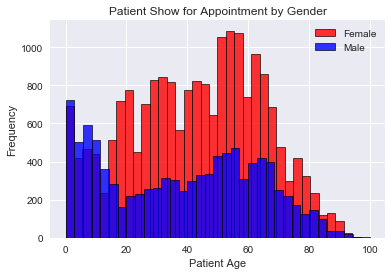

In [45]:
# Applying filter on Dataframe for column 'no_show' for 'No' and 'gender' for male Vs female and choosing column 'age' to
# plot trend 'age' Vs 'no_show' 'no'

df_noshow.query(' no_show == "No" and gender == "F" ')['age'].hist(bins=35,color='Red',edgecolor='black',linewidth=0.8,alpha=0.8,label='Female');
df_noshow.query(' no_show == "No" and gender == "M" ')['age'].hist(bins=35,color='blue',edgecolor='black',linewidth=0.8,alpha=0.8,label='Male')


plt.legend()
plt.title('Patient Show for Appointment by Gender')
plt.xlabel('Patient Age')
plt.ylabel('Frequency');

#### Above histogram shows that more patient of Gender: Female honor their appointment in comparison to the patient of Gender: Male 

#### Plot 3:Finding if there is a trend where patients DO NOT show up for Appointment per Gender and their age.

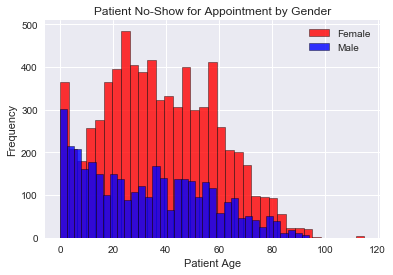

In [46]:
# Applying filter on Dataframe for column 'no_show' for 'Yes' and 'gender' for male and female,  and choosing column 'age' to
# plot trend 'age' Vs 'no_show' 'Yes'

df_noshow.query(' no_show == "Yes" and gender == "F" ')['age'].hist(bins=35,color='Red',edgecolor='black',linewidth=0.5,alpha=0.8,label='Female') 
df_noshow.query(' no_show == "Yes" and gender == "M" ')['age'].hist(bins=35,color='Blue',edgecolor='black',linewidth=0.5,alpha=0.8,label='Male')

plt.legend()
plt.title('Patient No-Show for Appointment by Gender')
plt.xlabel('Patient Age')
plt.ylabel('Frequency');

#### From the histogram above it looks like patient with Gender: Female miss appointmnet more versus to Gender: Male.

#### Plot 4: Finding if there is a trend where patients Do Not show up for Appointment per "SMS Received" or  "SMS Not Received" and their age.

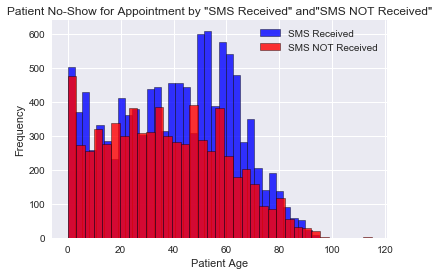

In [47]:
# Applying filter on Dataframe for (column 'no_show' for 'No'  and column 'sms_received' True )  and choosing column 'age' and superimposing Dataframe for (column 'no_show' for 'Yes'  and column 'sms_received' False )  and choosing column 'age'
# to see if sms-messages has any bearing on patient keeping appointment.

df_noshow.query(' no_show == "No" and sms_received == 1 ')['age'].hist(bins=35,color='blue',edgecolor='black',linewidth=0.5,alpha=0.8,label='SMS Received') 
df_noshow.query(' no_show == "Yes" and sms_received == 0 ')['age'].hist(bins=35,color='red',edgecolor='black',linewidth=0.5,alpha=0.8,label='SMS NOT Received')

plt.legend()
plt.title('Patient No-Show for Appointment by "SMS Received" and"SMS NOT Received"')
plt.xlabel('Patient Age')
plt.ylabel('Frequency');

#### Above histogram shows that count of patients who Do Not show up for Appointment did not receive SMS in comparison to patients who received  SMS message.  SMS--message might help patient remind the appointment thus increasing the probability of patient showing up for appointment.

#### Plot 5: Finding if there is a trend where patients Do Not show on particular week or month. Dataframe masked for "No-Show" is "Yes".

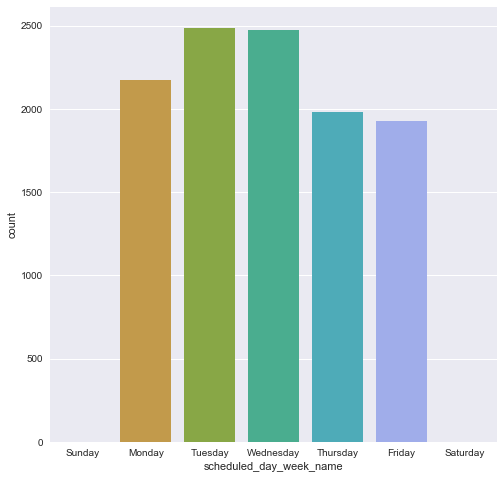

In [48]:
# Applying filter on Dataframe where column 'no_show' is 'Yes' and ploting weekday trends
 
orders = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
plt.figure(figsize=(8,8))
sns.countplot(x='scheduled_day_week_name', data=df_noshow_yes, order=orders);

#### Above plot show that weekday Tuesday, and Wednesday have highest "No-Show" for doctor's  appointment  

#### Plot 6:Neighbourhood trends for "No-Show" No and "No-Show" Yes

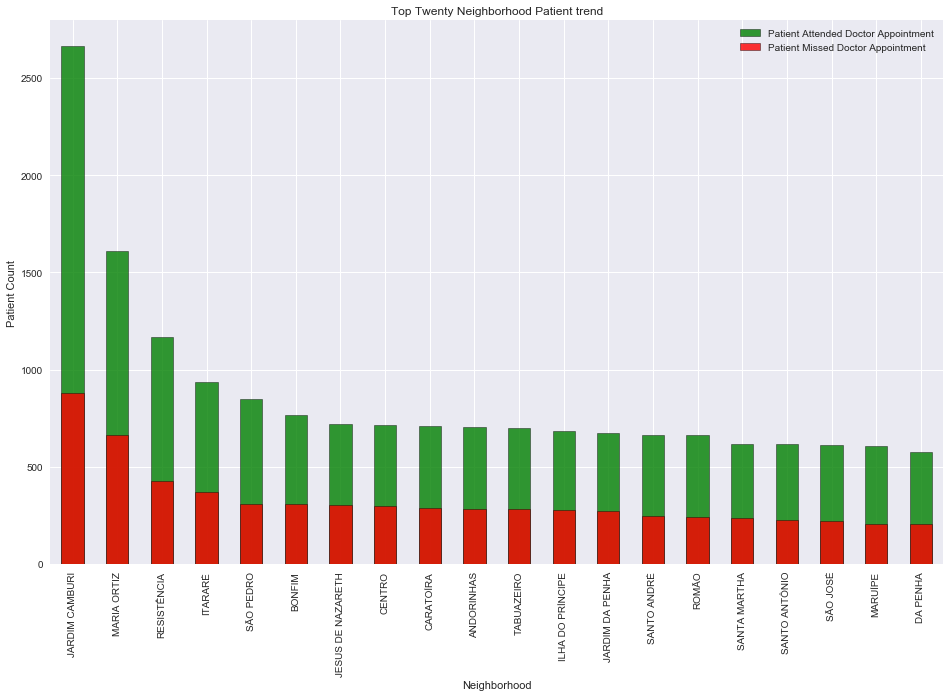

In [52]:
# Applyed filter on Dataframe based on neighborhood for 'no_show' 'No' and 'Yes'.

mask_neighborhood_noshow_no = df_noshow_no.groupby('neighbourhood')['neighbourhood'].count().nlargest(20)
mask_neighborhood_noshow_yes = df_noshow_yes.groupby('neighbourhood')['neighbourhood'].count().nlargest(20)


plt.figure(figsize=(16,10))
mask_neighborhood_noshow_no.plot.bar(color='green',edgecolor='black',linewidth=0.5,alpha=0.8,label='Patient Attended Doctor Appointment')
mask_neighborhood_noshow_yes.plot.bar(color='red',edgecolor='black',linewidth=0.5,alpha=0.8,label='Patient Missed Doctor Appointment')


plt.legend()
plt.title('Top Twenty Neighborhood Patient trend')
plt.xlabel('Neighborhood')
plt.ylabel('Patient Count');

#### Above bar plot show trend in patient's   'no_show'  'No' and 'Yes' by neighborhood.

#### Plot 7:Monthly trends for "No-Show"  Yes

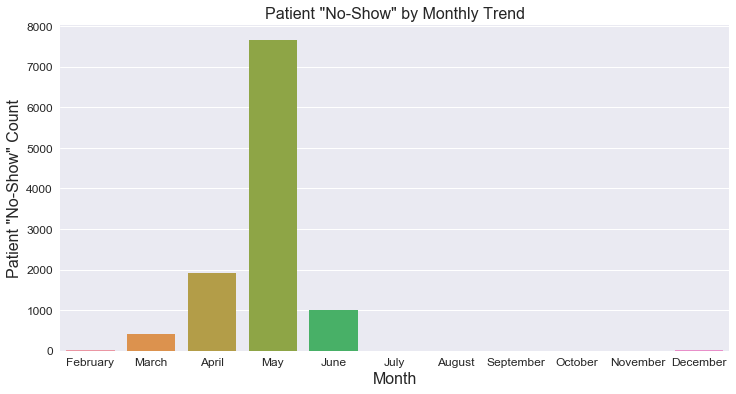

In [81]:
# Applyed filter on Dataframe with 'no_show' 'Yes' and looking monthly trends.
month_order = ['February','March','April','May','June','July','August','September','October','November','December']


plt.figure(figsize=(12,6))
sns.countplot(x='scheduled_day_month_name', data=df_noshow_yes, order=month_order)


plt.legend()
plt.title('Patient "No-Show" by Monthly Trend',fontsize=16)
plt.xlabel('Month',fontsize=16)
plt.ylabel('Patient "No-Show" Count',fontsize=16);
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12);

#### Above count plot show that "May" month has the highest "No-Show" Yes in comparison to other months.

## Draw Conclusions

#### In my opinion, features in the dataset does not help faithfully determine as to why the patient does not keep their appointment. This may be due to the way data is collected
- Binary Values assigned to features like 'scholarship', 'hypertension', 'diabetes', 'alcoholism', '   handicap' and 'sms_received' seems monolithic and does not tell the full story.
-  Additional features like Patient's income, Family_members_count, Education_level, type_of_job, and categories within various illness could have helped better analyze the issue of "No-Show."  

#### Having said that we could say 
- SMS messages do help people remind their appointment schedule and help patient to keep the doctor's appointment.
- Gender female is more responsible and kept  their doctor appointment more in comparison to gender male for "No-Show" No and surpirisly for "No-Show" Yes.
- Weekday 'Tuessday' and 'Wednsday' have highest "No-Show" 'Yes' than other week days.
- In top 20 neighborhoods,  "No-Show', No is more than Yes.  I think it is safe to assume that generally, the patient will keep the appointment.
- "May" month has the highest "No-Show" Yes in comparison to other months. These "No-Show" may be because Brazil has days long celebration during the month "May," (ref:https://www.timeanddate.com/holidays/brazil/)  and could be responsible for "No-Show."

### References


- https://www.kaggle.com/joniarroba/noshowappointments

- https://www.datacamp.com/community/tutorials/seaborn-python-tutorial
- http://pandas.pydata.org/pandas-docs/stable/10min.html
- https://stackoverflow.com/questions/11067027/python-pandas-re-ordering-columns-in-a-dataframe-based-on-column-name
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_string.html
- https://python-graph-gallery.com/seaborn/
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.query.html
- https://stackoverflow.com/questions/13611065/efficient-way-to-apply-multiple-filters-to-pandas-dataframe-or-series
